Loading Diabetes dataset and partitioning the 442 patients into a training set (composed of the first 422 patients) and a test set (the last 20 patients).

If we apply the test set to the linear regression prediction model we will get a series of targets to be compared with the values actually observed.

We can also draw the linear correlation between the ages of patients and the disease progression in the form of a scatterplot and the associated line.

Since we have 10 physiological factors within the diabetes dataset. Therefore, to have a more complete picture of all the training set, we can make a linear regression for every physiological feature, creating 10 models and seeing the result for each of them through a linear chart.

**Questions:**


1. Which physiological factors from the above calculation show correlation with the target? Explain the reasoning.  

2. If we combine these physiological factors that we deem influential on the target, what model can we get? Show graph and associated numbers.


# **Objectives**

To check the physiological data of 442 patients and to predict the diabetes disease progression after an year.

**1. Import Libraries**

In [ ]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import sklearn
import statsmodels as sm

from matplotlib import pyplot as plt
from sklearn import datasets

**2. Loading Dataset and Checking Data Information**

In [ ]:
diabetes = datasets.load_diabetes()

# Checking the summary of the data.

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**3. Data Pre-processing**

In [ ]:
# Checking the 10 values of the first patient.
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

**4. Splitting data into 2 types.**


1.   Training Data
2.   Testing Data



In [ ]:
# Creating training and testing data using slicing technique.
# X_ train slices values from 1st patient until last 20 patients. (i.e until patient 422).
# X_test slices values from last 20 patients (i.e from 422) to last patient.

X_train = diabetes.data[:-20]
X_test = diabetes.data[-20:]

In [ ]:
# As our data attribute is a 2-D array we get the number of rows and columns.
X_train.shape

(422, 10)

In [ ]:
X_test.shape

(20, 10)

In [ ]:
# y_ train slices values from 1st patient until last 20 patients. (i.e until patient 422).
# y_test slices values from last 20 patients (i.e from 422) to last patient.

y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

In [ ]:
# As our target attribute is a 1-D array we get only the number of rows.
y_train.shape

(422,)

In [ ]:
y_test.shape

(20,)

**5. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression # importing linear regression model.

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train) # fitting the model.

LinearRegression()

In [ ]:
# Displaying the array of weights estimated by Linear regression.
# As we have only one target value we get each coefficient for the 10 physiological variables.

print('Coefficients: ',LinReg.coef_)

Coefficients:  [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [ ]:
# As testing data contains the last 20 patients data, this is a prediction of the series of targets to be compared with actual values.
LinReg.predict(X_test)

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [ ]:
y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [ ]:
# Let's check the regression score which compares the actual and predicted values and check how close the values are.

LinReg.score(X_test,y_test)
# We can see that they are only 58 % close to each other.But they should be close to 100 % i.e 1.

0.5850753022690575

Let's check one physiological factor and perform Linear regression, so that we may get better variance.  

In [ ]:
# Taking the partitioned data into consideration, we create another pair of variables to store the values of a single factor.

X0_train = X_train[:,0] # creating an independent variable taking all patients details from column 0.
X0_test = X_test[:,0] # creating a dependent variable taking all patients details from column 0.

In [ ]:
X0_train.shape

(422,)

In [ ]:
X0_test.shape

(20,)

In [ ]:
# As an array needs to have 2 dimensions we add a newaxis i.e dimension using numpy library.
X0_train = X0_train[:,np.newaxis]
X0_train.shape

(422, 1)

In [ ]:
X0_test = X0_test[:,np.newaxis]
X0_test.shape


(20, 1)

In [ ]:
# Now applying linear regression model

LinReg0 = LinearRegression()
LinReg0.fit(X0_train,y_train)

LinearRegression()

In [ ]:
# As testing data contains the last 20 patients data, this is a prediction of the series of targets to be compared with actual values.
y = LinReg0.predict(X0_test)

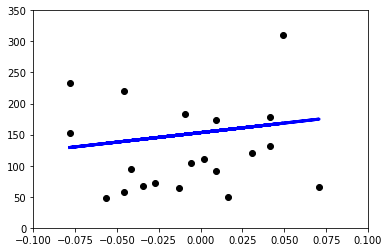

In [ ]:
# Plotting the graph using matplotlib library for the column 0 values.

plt.xlim(-0.1,0.1)
plt.ylim(0,350)
plt.scatter(X0_test,y_test,color='black') # plots the correlation points of the features and the target values. i.e actual outcome.
plt.plot(X0_test,y,color='blue',linewidth=3) # plots linear regression outcome of the features and the predicted values. i.e predicted outcome.
plt.show() # displays the graph.

The above chart represents the linear correlation between the feature and targets.

Let's check all the physiological factors at once to have a complete picture of all the training set.

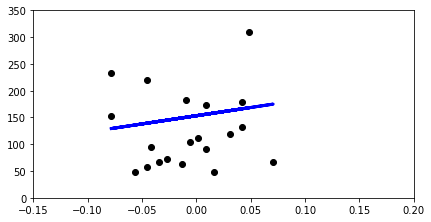

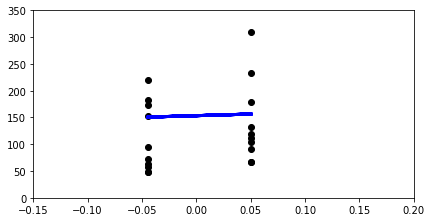

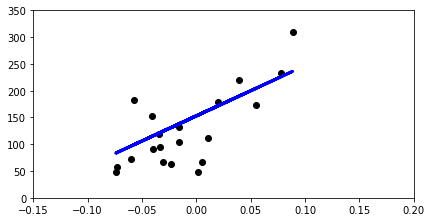

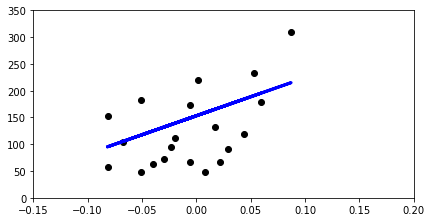

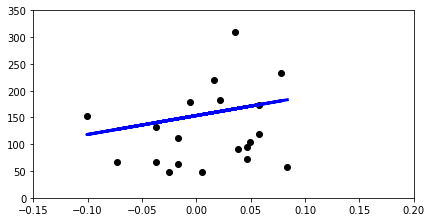

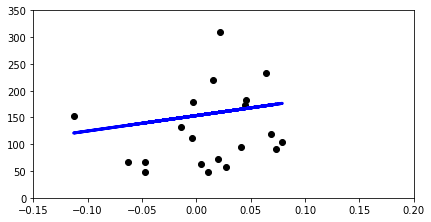

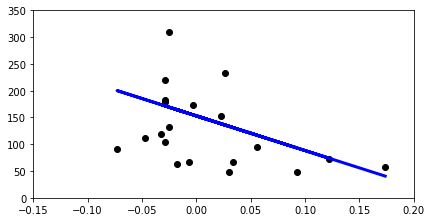

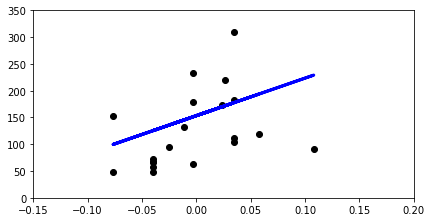

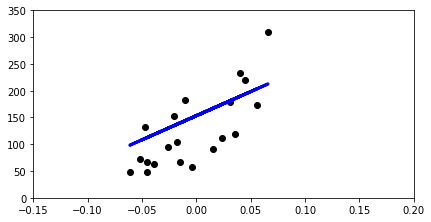

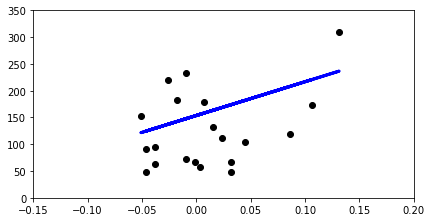

In [ ]:
# Using the same partitioned data to test all the factors through linear regression model.

# Using a for loop condition to set the range for all factors.
for n in range(0,10):
  XAll_train = X_train[:,n] # creating an independent variable taking all patients details from column 0 to 10 i.e all columns.
  XAll_test = X_test[:,n] # creating a dependent variable taking all patients details from column 0 to 10 i.e all columns.
  # As an array needs to have 2 dimensions we add a newaxis i.e dimension using numpy library.
  XAll_train = XAll_train[:,np.newaxis]
  XAll_test = XAll_test[:,np.newaxis]
  # Fitting the linear regression model to the training and testing variables.
  LinRegAll = LinearRegression()
  LinRegAll.fit(XAll_train,y_train)
  yAll = LinRegAll.predict(XAll_test)
  plt.figure(figsize=(15,20))
  # As we more than 1 linear charts to be plotted we use subplot function to plot all at once.
  plt.subplot(5,2,10) # giving range 5 rows, 2 columns and no. of plots, in our case it's 10 graphs.
  plt.xlim(-0.15,0.20) # giving x-axis range
  plt.ylim(0,350) # giving y-axis range
  plt.scatter(XAll_test,y_test,color='black') # plotting scattered test data
  plt.plot(XAll_test,yAll,color='blue',linewidth=3) # plotting regression line


**6. Correlation check using Statsmodel**

In [ ]:
# Now checking which physiological factor shows correlation with the target.

# We use statsmodels library which is used to identify which factors are statiscally significant.

# Converting our data to pandas dataframe to use statsmodels method.

diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names) # converts our data to pandas dataframe and feature names displays the column names.

diabetes_df['progression']=diabetes.target # adding the target column to the dataframe.

In [ ]:
diabetes_df.head() # top 5 values.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes_df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']] # assigning data column values to an independent variable.

In [ ]:
y = diabetes_df.progression # assigning target column values to dependent variable.

In [ ]:
from statsmodels.api import add_constant # using add constant method from statsmodel
X = add_constant(X)
X['const'].head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: const, dtype: float64

In [ ]:
# Let's import the linear regression model here

from statsmodels.api import OLS # OLS is the linear regression model from statsmodel library.

In [ ]:
LinReg_test = OLS(y,X).fit()  # we fit the model
LinReg_test.summary() # gives the summary values.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           3.83e-62
Time:                        04:00:10   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X.drop('age',axis=1,inplace=True) # dropping columns with higher probability.

In [ ]:
X.drop('s3',axis=1,inplace=True)

In [ ]:
X.drop('s2',axis=1,inplace=True)

In [ ]:
X.drop('s6',axis=1,inplace=True)

In [ ]:
LinReg_test1 = OLS(y,X).fit() # rechecking the model
LinReg_test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.71e-65
Time:                        04:00:10   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.575     59.072      0.000     147.072     157.195
sex         -224.9789     60.186     -3.738      0.000    -343.270    -106.688
bmi          548.6486     64.565      8.498      0.000     421.750     675.547
bp           334.4542     63.062      5.304      0.000     210.510     458.398
s1          -306.4788     68.411     -4.480      0.000    -440.936    -172.022
s4           279.2124     80.134      3.484      0.001     121.715     436.710
s5           558.9589     76.305      7.325      0.000     408.987     708.930
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.487
Skew:                           0.065   Prob(JB):                        0.475
Kurtosis:                       2.748   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LinReg_test2 = OLS(y,X).fit()
LinReg_test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.71e-65
Time:                        04:00:10   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.575     59.072      0.000     147.072     157.195
sex         -224.9789     60.186     -3.738      0.000    -343.270    -106.688
bmi          548.6486     64.565      8.498      0.000     421.750     675.547
bp           334.4542     63.062      5.304      0.000     210.510     458.398
s1          -306.4788     68.411     -4.480      0.000    -440.936    -172.022
s4           279.2124     80.134      3.484      0.001     121.715     436.710
s5           558.9589     76.305      7.325      0.000     408.987     708.930
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.487
Skew:                           0.065   Prob(JB):                        0.475
Kurtosis:                       2.748   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LinReg_test3 = OLS(y,X).fit()
LinReg_test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.71e-65
Time:                        04:00:10   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.575     59.072      0.000     147.072     157.195
sex         -224.9789     60.186     -3.738      0.000    -343.270    -106.688
bmi          548.6486     64.565      8.498      0.000     421.750     675.547
bp           334.4542     63.062      5.304      0.000     210.510     458.398
s1          -306.4788     68.411     -4.480      0.000    -440.936    -172.022
s4           279.2124     80.134      3.484      0.001     121.715     436.710
s5           558.9589     76.305      7.325      0.000     408.987     708.930
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.487
Skew:                           0.065   Prob(JB):                        0.475
Kurtosis:                       2.748   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LinReg_test4 = OLS(y,X).fit()
LinReg_test4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.71e-65
Time:                        04:00:10   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.575     59.072      0.000     147.072     157.195
sex         -224.9789     60.186     -3.738      0.000    -343.270    -106.688
bmi          548.6486     64.565      8.498      0.000     421.750     675.547
bp           334.4542     63.062      5.304      0.000     210.510     458.398
s1          -306.4788     68.411     -4.480      0.000    -440.936    -172.022
s4           279.2124     80.134      3.484      0.001     121.715     436.710
s5           558.9589     76.305      7.325      0.000     408.987     708.930
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.487
Skew:                           0.065   Prob(JB):                        0.475
Kurtosis:                       2.748   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**7. Re-training the model**

In [ ]:
from sklearn.model_selection import train_test_split # training the new model

In [ ]:
XNew_train,XNew_test,yNew_train,yNew_test = train_test_split(X,y,random_state=0) # Assigining new training and testing data

In [ ]:
from sklearn.linear_model import LinearRegression # Fitting the model to check the values.
LinRegNew = LinearRegression()
LinRegNew=LinRegNew.fit(XNew_train,yNew_train)

In [ ]:
LinRegNew.coef_ # checks the coefficients.

array([   0.        , -199.3499015 ,  616.13091571,  294.28618699,
       -342.45883286,  253.58443985,  597.22839951])

In [ ]:
linearPredict = LinRegNew.predict(XNew_test) # using predict to check the testing data.
linearPredict

array([241.84990477, 248.88866993, 163.96039997, 117.62297207,
       192.08884679, 258.17083622, 114.42627225, 188.79290383,
       152.04615747, 237.86532024, 167.46063551, 181.54744086,
       108.65227506,  89.62858866, 246.56669263,  89.04520503,
       143.57617058,  74.38543972,  90.98594286, 210.90298025,
       193.70833556, 160.42099911, 161.95075325, 159.95476678,
       201.32336739, 166.74099024, 127.5265857 ,  84.22975642,
       191.41813849, 162.11256618, 176.60037589,  83.94637526,
       140.87325853, 138.83289877, 138.50259559, 193.06652008,
       158.38529754, 191.49125808, 126.02663168, 202.91157327,
        80.29791647, 156.81175048, 141.88799157, 181.25184827,
       178.99150033,  77.75128216, 147.65821939, 137.98555623,
       117.35256632, 226.23911608, 161.1911074 ,  75.1517473 ,
       154.04640046, 156.85038796, 234.17541245, 173.6946923 ,
       188.4522372 , 120.09566629, 130.21716582, 169.53856042,
       211.17672004, 171.20924698, 159.05410404, 106.89

In [ ]:
XNew_test.shape # checking no. of rows and columns

(111, 7)

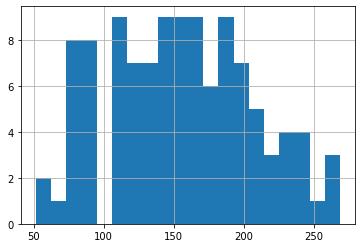

In [ ]:
series = pd.Series(linearPredict) # plotting predicted values using hist plot.
series.hist(bins=20)